In [42]:
import pandas as pd
import nltk
import re
import numpy as np
from textblob import TextBlob
import matplotlib.pyplot as plt
from sklearn.decomposition import LatentDirichletAllocation
from collections import Counter
from nltk.sentiment import SentimentIntensityAnalyzer
import seaborn as sns
import random as rd
from math import sqrt
#from wordcloud import WordCloud, STOPWORDS

In [64]:
#Data being imported
data = pd.read_csv('chatgpt1.csv')

data.head()


Index(['Datetime', 'Tweet Id', 'Text', 'Username', 'Permalink', 'User',
       'Outlinks', 'CountLinks', 'ReplyCount', 'RetweetCount', 'LikeCount',
       'QuoteCount', 'ConversationId', 'Language', 'Source', 'Media',
       'QuotedTweet', 'MentionedUsers', 'hashtag', 'hastag_counts'],
      dtype='object')

In [44]:
#Sentiment analyzer
sentiment = SentimentIntensityAnalyzer()

def sentiment_type(tweet):
    try:
        if sentiment.polarity_scores(tweet)['compound'] > 0:
            return "Positive"
        elif sentiment.polarity_scores(tweet)['compound'] < 0:
            return "Negative"
        else:
            return "Neutral"
    except:
        return "Neutral"

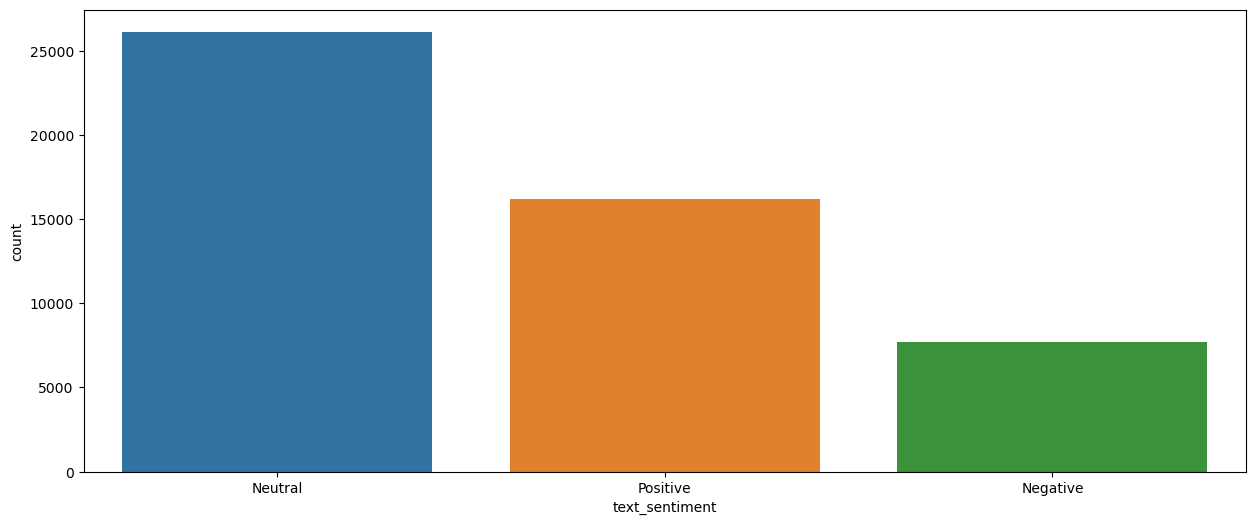

In [45]:
data['text_sentiment'] = data['Text'].apply(lambda x: sentiment_type(x))

data['text_sentiment'].value_counts()
#Showing sentiment analysis through matplot
plt.figure(figsize=(15,6))
sns.countplot(data=data, x='text_sentiment')
plt.show()

In [46]:
#Showing hashtag counts
data.hashtag.value_counts()

[]                                                                                                                                                                                                                                                           36414
['#ChatGPT']                                                                                                                                                                                                                                                  2899
['#chatgpt']                                                                                                                                                                                                                                                   314
['#chatGPT']                                                                                                                                                                                                                   

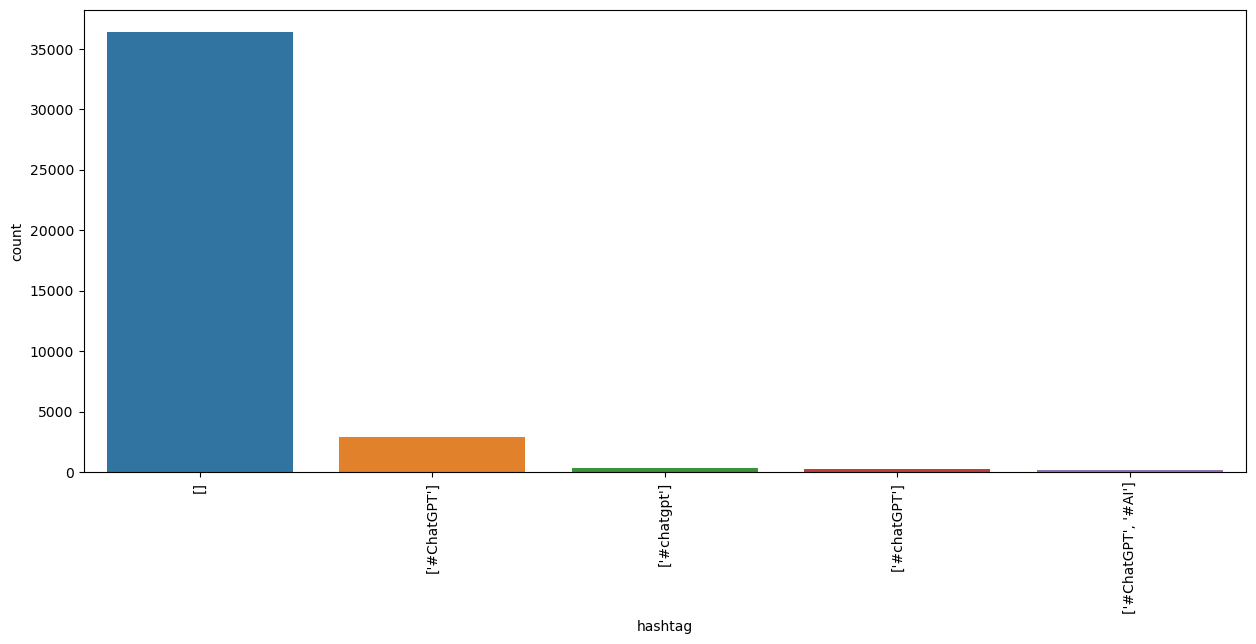

In [47]:
#Plotting frequency of hashtags
plt.figure(figsize=(15,6))
sns.countplot(data=data, x='hashtag',order=data.hashtag.value_counts().index[:5])
plt.xticks(rotation=90)
plt.show()

In [48]:
#Library for implementing K-means clustering
from sklearn.cluster import KMeans


In [65]:
K = 3
Centroids = (X.sample(n=K))
plt.scatter(X["RetweetCount"], X["LikeCount"], c="blue")
plt.scatter(Centroids["RetweetCount"], Centroids["LikeCount"], c="red")
plt.xlabel("RetweetCount")
plt.ylabel("LikeCount")
plt.show()

KeyError: 'RetweetCount'

In [63]:

X = data[["Tweet Id", "ReplyCount"]]
# Visualize data point
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

/Users/student/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


AttributeError: 'NoneType' object has no attribute 'split'